In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

from skimage.io import imread
from scipy.ndimage import convolve
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

<h1>Working with Images and Text</h1>

<h2>Demos</h2>

In [3]:
tiger = imread("data/tiger.jpg")

In [4]:
tiger.shape

(600, 580, 3)

In [5]:
type(tiger)

numpy.ndarray

In [6]:
def img_show(image, cmap=None):
    plt.figure(figsize=(5, 5))
 
    plt.imshow(image)
    
    plt.xticks([])
    plt.yticks([])

    plt.show()

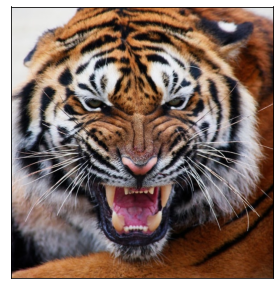

In [7]:
img_show(tiger)

In [8]:
# Get image channels - cropping
tiger[200:400, 150:450]

array([[[139, 143, 146],
        [127, 131, 134],
        [134, 138, 141],
        ...,
        [ 22,  22,  30],
        [ 17,  17,  25],
        [ 17,  17,  25]],

       [[156, 156, 156],
        [180, 181, 183],
        [195, 199, 200],
        ...,
        [ 39,  38,  44],
        [ 28,  27,  33],
        [ 22,  22,  30]],

       [[147, 146, 142],
        [157, 157, 155],
        [162, 163, 165],
        ...,
        [ 37,  32,  36],
        [ 27,  26,  31],
        [ 21,  22,  27]],

       ...,

       [[113, 118, 122],
        [216, 219, 224],
        [ 64,  65,  69],
        ...,
        [137, 134, 145],
        [135, 132, 139],
        [141, 139, 144]],

       [[182, 187, 191],
        [140, 143, 148],
        [  6,   7,  11],
        ...,
        [143, 140, 149],
        [136, 131, 138],
        [146, 141, 147]],

       [[207, 210, 215],
        [ 31,  34,  39],
        [ 10,  11,  15],
        ...,
        [146, 143, 152],
        [142, 137, 144],
        [137, 132, 138]]

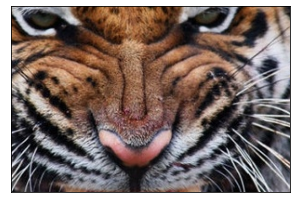

In [9]:
img_show(tiger[200:400, 150:450])

In [10]:
def img_show_gray(image):
    plt.figure(figsize=(5, 5))
 
    plt.imshow(image, cmap="gray")
    
    plt.xticks([])
    plt.yticks([])

    plt.show()

In [11]:
# Get the channels - red, green and blue
tiger_r = tiger[:, :, 0]
tiger_g = tiger[:, :, 1]
tiger_b = tiger[:, :, 2]

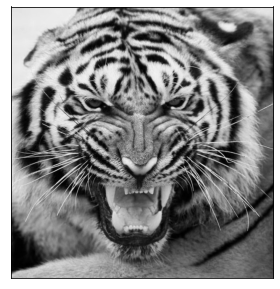

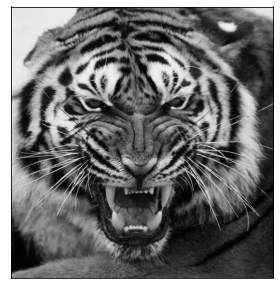

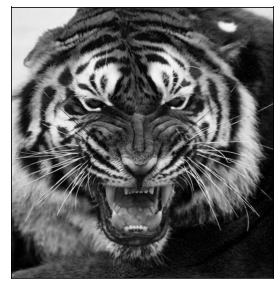

In [12]:
# Plot of red channel
img_show_gray(tiger_r)
# Plot of green channel
img_show_gray(tiger_g)
# Plot of blue channel
img_show_gray(tiger_b)

In [13]:
# Corrected image of grayscale
tiger_grayscale = 0.299 * tiger_r + 0.587 * tiger_g + 0.114 * tiger_b

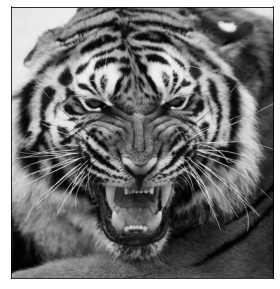

In [14]:
img_show_gray(tiger_grayscale)

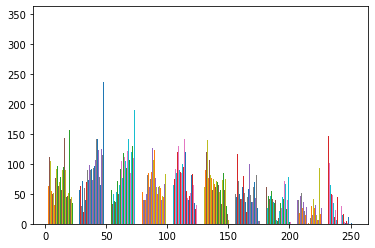

In [15]:
# This is not a real histogram of the picture It shows 250 histograms :D
plt.hist(tiger_grayscale)
plt.show()

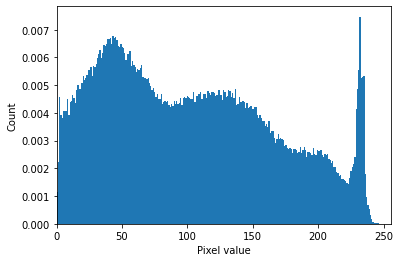

In [16]:
# tiger_grayscale.ravel() - use this to make all 2-dimensional values to be one dimensional
plt.hist(tiger_grayscale.ravel(), bins=256, density=True)

plt.xlim(0, 256)
plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.show()

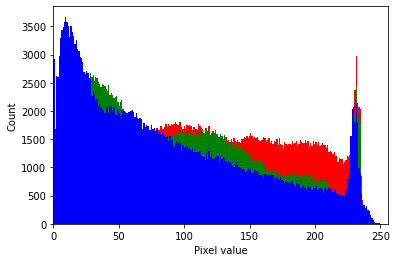

In [17]:
# RGB channels histogram
plt.hist(tiger_r.ravel(), bins=256, color="red")
plt.hist(tiger_g.ravel(), bins=256, color="green")
plt.hist(tiger_b.ravel(), bins=256, color="blue")

plt.xlim(0, 256)
plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.show()

In [18]:
tiger_r.mean(), tiger_g.mean(), tiger_b.mean()

(120.53295689655172, 97.3193132183908, 87.46683045977011)

In [19]:
#Convolution of image
size = 55
conv_filter = np.ones((size, size)) / (size * size)
blurred = convolve(tiger_grayscale, conv_filter)

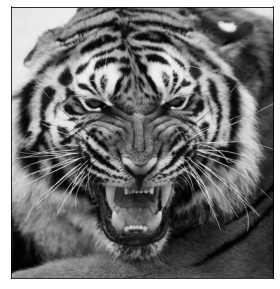

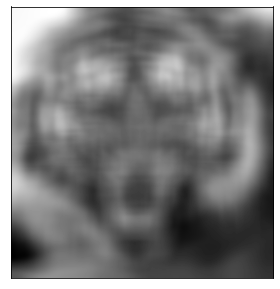

In [20]:
img_show_gray(tiger_grayscale)
img_show_gray(blurred)
# Show blur details more visible
# img_show_gray(tiger_grayscale[150:250, 300:400])
# img_show_gray(blurred[150:250, 300:400])

In [21]:
# Edge detector filter
edge_detector = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

edges = convolve(tiger_grayscale, edge_detector)

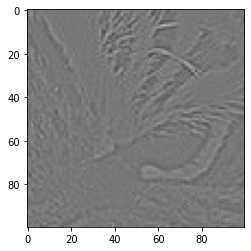

In [22]:
plt.imshow(edges[150:250, 300:400], cmap="gray", vmin = edges.min(), vmax=edges.max())
plt.show()

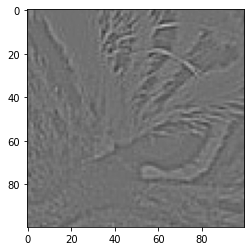

In [23]:
# Edge detector filter - compared with the previous one
edge_detector = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

edges = convolve(tiger_grayscale, edge_detector)
plt.imshow(edges[150:250, 300:400], cmap="gray", vmin = edges.min(), vmax=edges.max())
plt.show()

In [24]:
# Image morphology
threshold = 128
tiger_binary = tiger_grayscale.copy()
tiger_binary[tiger_binary <= threshold] = 0
tiger_binary[tiger_binary > threshold] = 255

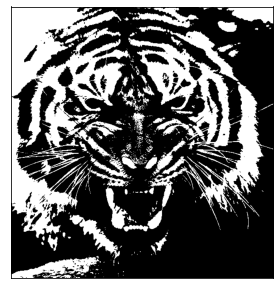

In [25]:
img_show_gray(tiger_binary)

In [26]:
with open("data/alice.txt", "r", encoding="utf8") as file:
    alice = file.read()

In [27]:
print(alice)




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

















ALICE’S ADVENTURES
IN WONDERLAND


By Lewis Carroll



THE MILLENNIUM FULCRUM EDITION 3.0





Contents
CHAPTER I. 	Down the Rabbit-Hole
CHAPTER II. 	The Pool of Tears
CHAPTER III. 	A Caucus-Race and a Long Tale
CHAPTER IV. 	The Rabbit Sends in a Little Bill
CHAPTER V. 	Advice from a Caterpillar
CHAPTER VI. 	Pig and Pepper
CHAPTER VII. 	A Mad 

In [28]:
alice_words = [word for word in re.split('\W+', alice) if word != '']

In [29]:
alice_words

['Project',
 'Gutenberg',
 's',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'You',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'Title',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'Author',
 'Lewis',
 'Carroll',
 'Release',
 'Date',
 'June',
 '25',
 '2008',
 'EBook',
 '11',
 'Last',
 'Updated',
 'October',
 '6',
 '2016',
 'Language',
 'English',
 'Character',
 'set',
 'encoding',
 'UTF',
 '8',
 'START',
 'OF',
 'THIS',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'ALICE',
 'S',
 'ADVENTURES',
 'IN',
 'WONDERLAND',
 'Produced',
 'by',
 'Arthur',
 'DiBianca',
 'and',
 'Da

In [30]:
# Number of each words in text
alice_counter = Counter(alice_words)

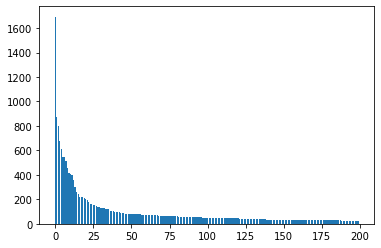

In [31]:
most_common_words = [pair[1] for pair in alice_counter.most_common(200)]
plt.bar(range(len(most_common_words)),  most_common_words)
plt.show()

In [32]:
Counter(alice.lower()).most_common(20)

[(' ', 29580),
 ('e', 15441),
 ('t', 12241),
 ('a', 9846),
 ('o', 9496),
 ('i', 8669),
 ('n', 8066),
 ('h', 7915),
 ('s', 7280),
 ('r', 6648),
 ('d', 5491),
 ('l', 5227),
 ('u', 3990),
 ('c', 3028),
 ('w', 2956),
 ('g', 2948),
 ('y', 2589),
 (',', 2566),
 ('m', 2469),
 ('f', 2385)]

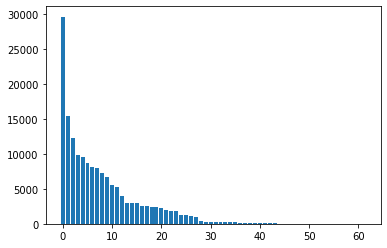

In [33]:
most_common_characters = [pair[1] for pair in Counter(alice.lower()).most_common(100)]
plt.bar(range(len(most_common_characters)), most_common_characters)
plt.show()

In [34]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\petko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
english_stopwords = set(stopwords.words("english"))

In [36]:
alice_words_clean = [word.lower() for word in alice_words if word.lower() not in english_stopwords]

In [37]:
Counter(alice_words_clean).most_common(20)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

In [38]:
alice_words_stems = [PorterStemmer().stem(word) for word in alice_words_clean]

In [39]:
Counter(alice_words_stems).most_common(20)

[('said', 462),
 ('alic', 404),
 ('littl', 129),
 ('one', 107),
 ('look', 106),
 ('like', 97),
 ('gutenberg', 93),
 ('know', 92),
 ('project', 87),
 ('work', 86),
 ('would', 83),
 ('went', 83),
 ('thing', 82),
 ('thought', 80),
 ('could', 78),
 ('queen', 77),
 ('time', 77),
 ('go', 77),
 ('see', 71),
 ('say', 70)]

In [40]:
vectorizer = TfidfVectorizer(
    input = "content", 
    analyzer = "word", 
    ngram_range = (1, 3), 
    min_df = 0, 
    stop_words = english_stopwords, 
    sublinear_tf = True
)

In [41]:
newsgroups = fetch_20newsgroups()

In [42]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [43]:
vectorized_matrix = vectorizer.fit_transform(newsgroups.data)

In [44]:
feature_names = vectorizer.get_feature_names()

In [45]:
doc = 0 # Change the index to view another document
feature_index = vectorized_matrix[doc, :].nonzero()[1]
tfidf_scores = zip(feature_index, [vectorized_matrix[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)

brought neighborhood lerxst 0.08368537452961448
il brought neighborhood 0.08735949462493123
thanks il brought 0.08735949462493123
mail thanks il 0.08735949462493123
please mail thanks 0.06972663932035666
car please mail 0.08368537452961448
looking car please 0.08368537452961448
funky looking car 0.08368537452961448
info funky looking 0.08368537452961448
whatever info funky 0.08368537452961448
history whatever info 0.08368537452961448
made history whatever 0.08368537452961448
car made history 0.08368537452961448
production car made 0.08368537452961448
years production car 0.08368537452961448
specs years production 0.08368537452961448
engine specs years 0.08368537452961448
name engine specs 0.08368537452961448
model name engine 0.08368537452961448
tellme model name 0.08368537452961448
anyone tellme model 0.08368537452961448
know anyone tellme 0.08368537452961448
body know anyone 0.08368537452961448
rest body know 0.08368537452961448
separate rest body 0.08368537452961448
bumper separate 